# Boston 주택 가격 예측 모델

In [35]:
from keras.datasets import boston_housing
from tensorflow.keras import models, layers, utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [38]:
# validation data 분리
tr_data, val_data, tr_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.3, random_state=11)

In [39]:
# 표준화
mean = tr_data.mean(axis=0)
std = tr_data.std(axis=0)

tr_data = (tr_data - mean) / std

val_data = (val_data - mean) / std

test_data = (test_data - mean) / std

In [46]:
# 모델 구성 및 컴파일
model = models.Sequential()
model.add(layers.Input(shape=(13,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='Adam', loss='mse', metrics='mae')

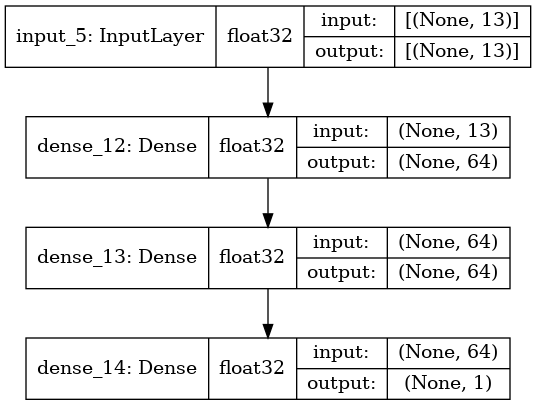

In [47]:
# 모델 시각화
utils.plot_model(model, show_shapes=True, show_dtype=True)

In [48]:
# 모델 학습
history = model.fit(tr_data, tr_labels, epochs=50, batch_size=50, validation_data=(val_data, val_labels))

Epoch 1/50
6/6 [==============================] - 0s 25ms/step - loss: 572.6163 - mae: 22.0611 - val_loss: 567.8013 - val_mae: 21.9420
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 549.0817 - mae: 21.4925 - val_loss: 542.8130 - val_mae: 21.3501
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 525.6624 - mae: 20.9044 - val_loss: 516.4300 - val_mae: 20.7103
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 499.8025 - mae: 20.2591 - val_loss: 487.3421 - val_mae: 19.9897
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 472.1883 - mae: 19.5097 - val_loss: 453.9883 - val_mae: 19.1584
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 439.0128 - mae: 18.6228 - val_loss: 415.9352 - val_mae: 18.1639
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 401.0187 - mae: 17.6139 - val_loss: 372.6357 - val_mae: 17.0204
Epoch 8/50
6/6 [==============================] - 0s 7ms/step

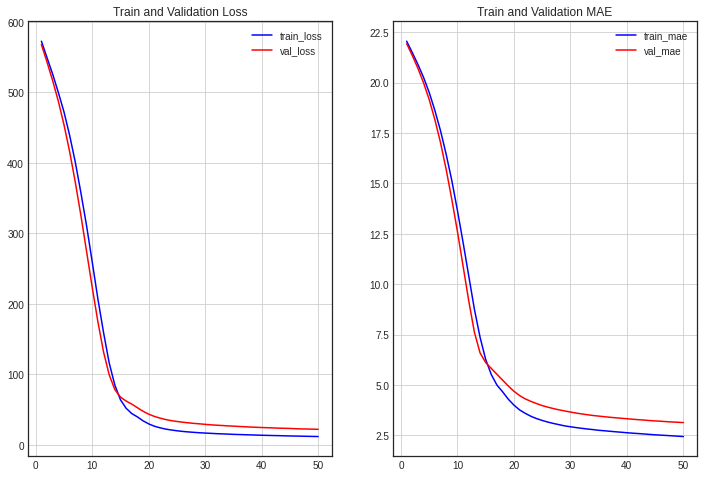

In [54]:
# 학습 차트 시각화
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

f = plt.figure(figsize=(12, 8))
ax1 = f.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b', label='train_loss')
ax1.plot(epochs, val_loss, 'r', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = f.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b', label='train_mae')
ax2.plot(epochs, val_mae, 'r', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.grid()
ax2.legend()

plt.show()

In [55]:
# test 데이터로 모델 평가
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 22.1133 - mae: 3.4787


[22.11331558227539, 3.4786908626556396]

# Reuters 딥러닝 모델

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks, utils
from keras.datasets import reuters

In [89]:
# train, valid, test 분리
(x_train_full, y_train_full), (x_test, y_test) = reuters.load_data(num_words=10000)

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.25, random_state=11)

print(len(x_train))
print(len(x_val))
print(len(x_test))
print(len(set(y_train)))

6736
2246
2246
46


In [116]:
# 텍스트 데이터 전처리
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1
    
    return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(x_test)

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

In [143]:
# 모델 구성 및 컴파일
model = models.Sequential()
model.add(layers.Dense(256, input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

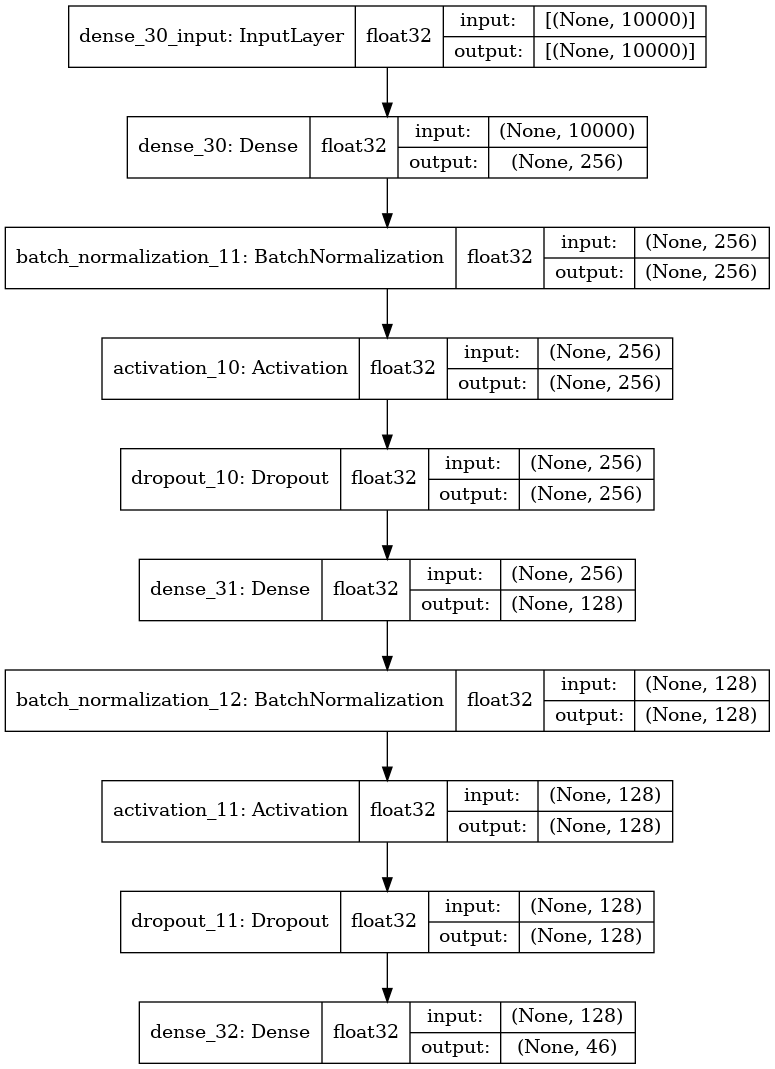

In [144]:
# 모델 시각화
utils.plot_model(model, show_dtype=True, show_shapes=True)

In [145]:
# callback 설정
cp = callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [146]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=50, batch_size=200, validation_data=(x_val, y_val), callbacks=[cp, es])

Epoch 1/50
34/34 [==============================] - 1s 19ms/step - loss: 2.6914 - accuracy: 0.4363 - val_loss: 2.7903 - val_accuracy: 0.6603
Epoch 2/50
34/34 [==============================] - 0s 8ms/step - loss: 1.3686 - accuracy: 0.6992 - val_loss: 2.2422 - val_accuracy: 0.7195
Epoch 3/50
34/34 [==============================] - 0s 8ms/step - loss: 1.0383 - accuracy: 0.7613 - val_loss: 1.8469 - val_accuracy: 0.7248
Epoch 4/50
34/34 [==============================] - 0s 8ms/step - loss: 0.8247 - accuracy: 0.8089 - val_loss: 1.5416 - val_accuracy: 0.7386
Epoch 5/50
34/34 [==============================] - 0s 8ms/step - loss: 0.6723 - accuracy: 0.8409 - val_loss: 1.3348 - val_accuracy: 0.7493
Epoch 6/50
34/34 [==============================] - 0s 8ms/step - loss: 0.5602 - accuracy: 0.8679 - val_loss: 1.1632 - val_accuracy: 0.7565
Epoch 7/50
34/34 [==============================] - 0s 8ms/step - loss: 0.4794 - accuracy: 0.8852 - val_loss: 1.0236 - val_accuracy: 0.7872
Epoch 8/50
34/34 [=

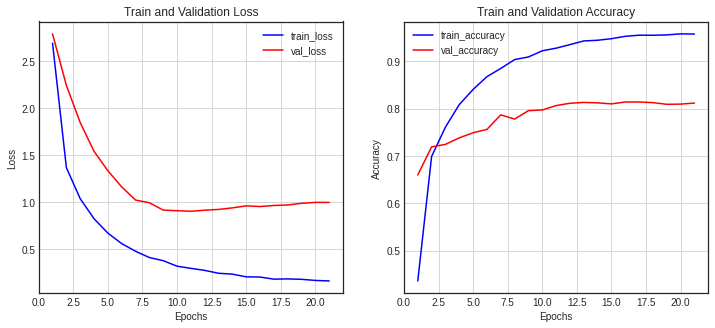

In [147]:
# `loss`, `val_loss`, `accuracy`, `val_accuracy`차트 시각화
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [148]:
# test 데이터로 모델 평가
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9248 - accuracy: 0.8050


[0.9247953295707703, 0.8049866557121277]

# CIFAR10 딥러닝 모델

In [152]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from keras.datasets import cifar10

In [153]:
# train, validation, test 분리
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=11)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)

170508288/170498071 [==============================] - 4s 0us/step
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)


In [155]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

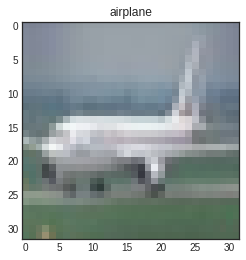

In [161]:
# x_train[0] 이미지 시각화
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.title(class_names[y_train[0, 0]])
plt.show()

In [167]:
# 학습을 위해 reshape
x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

In [168]:
np.max(x_train)

255

In [169]:
# 255로 나눠 정규화
x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

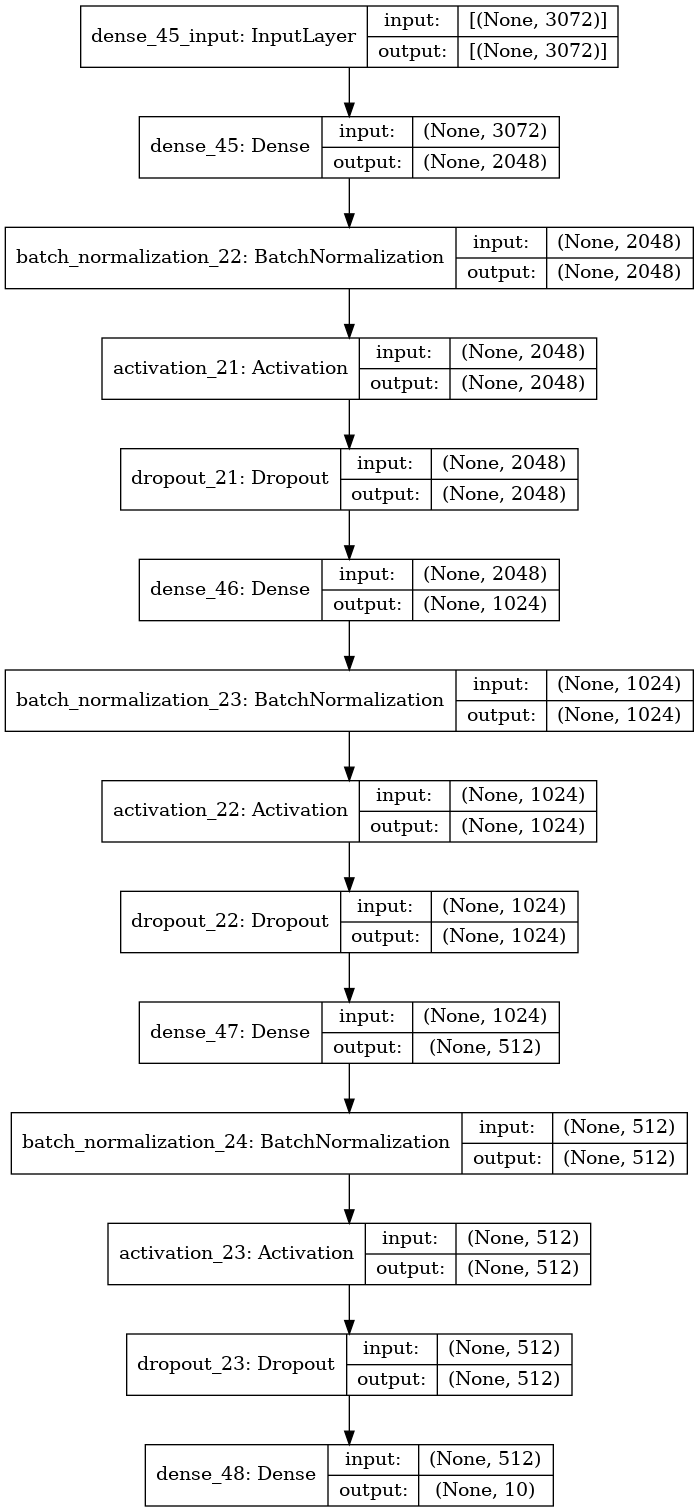

In [170]:
# 모델 구성
model = models.Sequential()
model.add(layers.Dense(2048, input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
utils.plot_model(model, show_shapes=True)

In [171]:
# callback의 modelcheckpoint와 earlystopping 적용하여 학습
cb = callbacks.ModelCheckpoint('best_model2.h5', save_best_only=True)
es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_val, y_val), callbacks=[cb, es])

Epoch 1/50
79/79 [==============================] - 2s 13ms/step - loss: 2.1182 - accuracy: 0.2894 - val_loss: 3.2307 - val_accuracy: 0.2436
Epoch 2/50
79/79 [==============================] - 1s 10ms/step - loss: 1.7637 - accuracy: 0.3734 - val_loss: 1.8320 - val_accuracy: 0.3446
Epoch 3/50
79/79 [==============================] - 1s 10ms/step - loss: 1.6168 - accuracy: 0.4213 - val_loss: 1.8411 - val_accuracy: 0.3300
Epoch 4/50
79/79 [==============================] - 1s 10ms/step - loss: 1.5368 - accuracy: 0.4491 - val_loss: 1.6992 - val_accuracy: 0.3897
Epoch 5/50
79/79 [==============================] - 1s 10ms/step - loss: 1.4728 - accuracy: 0.4738 - val_loss: 1.7435 - val_accuracy: 0.3832
Epoch 6/50
79/79 [==============================] - 1s 10ms/step - loss: 1.4259 - accuracy: 0.4882 - val_loss: 1.6921 - val_accuracy: 0.3856
Epoch 7/50
79/79 [==============================] - 1s 10ms/step - loss: 1.3889 - accuracy: 0.5021 - val_loss: 1.6437 - val_accuracy: 0.4241
Epoch 8/50
79

In [172]:
# test 이용해 모델 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4744 - accuracy: 0.4769


[1.4743975400924683, 0.47690001130104065]

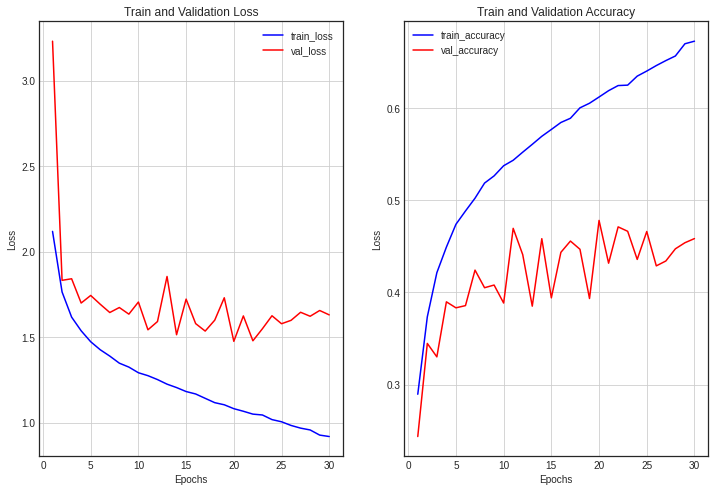

In [175]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

f = plt.figure(figsize=(12, 8))
ax1 = f.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b', label='train_loss')
ax1.plot(epochs, val_loss, 'r', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
ax2 = f.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, 'b', label='train_accuracy')
ax2.plot(epochs, val_acc, 'r', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

plt.show()